In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [7]:
data = pd.read_csv('C:\Machine_failure_prediction _Major project\data.csv')

In [11]:
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [14]:
data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [15]:
data.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

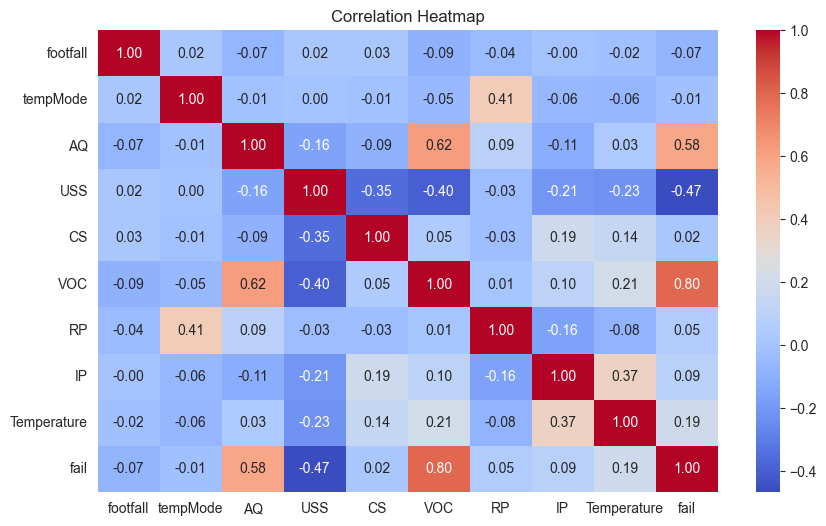

In [18]:
#Heatmap to describe the data 
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

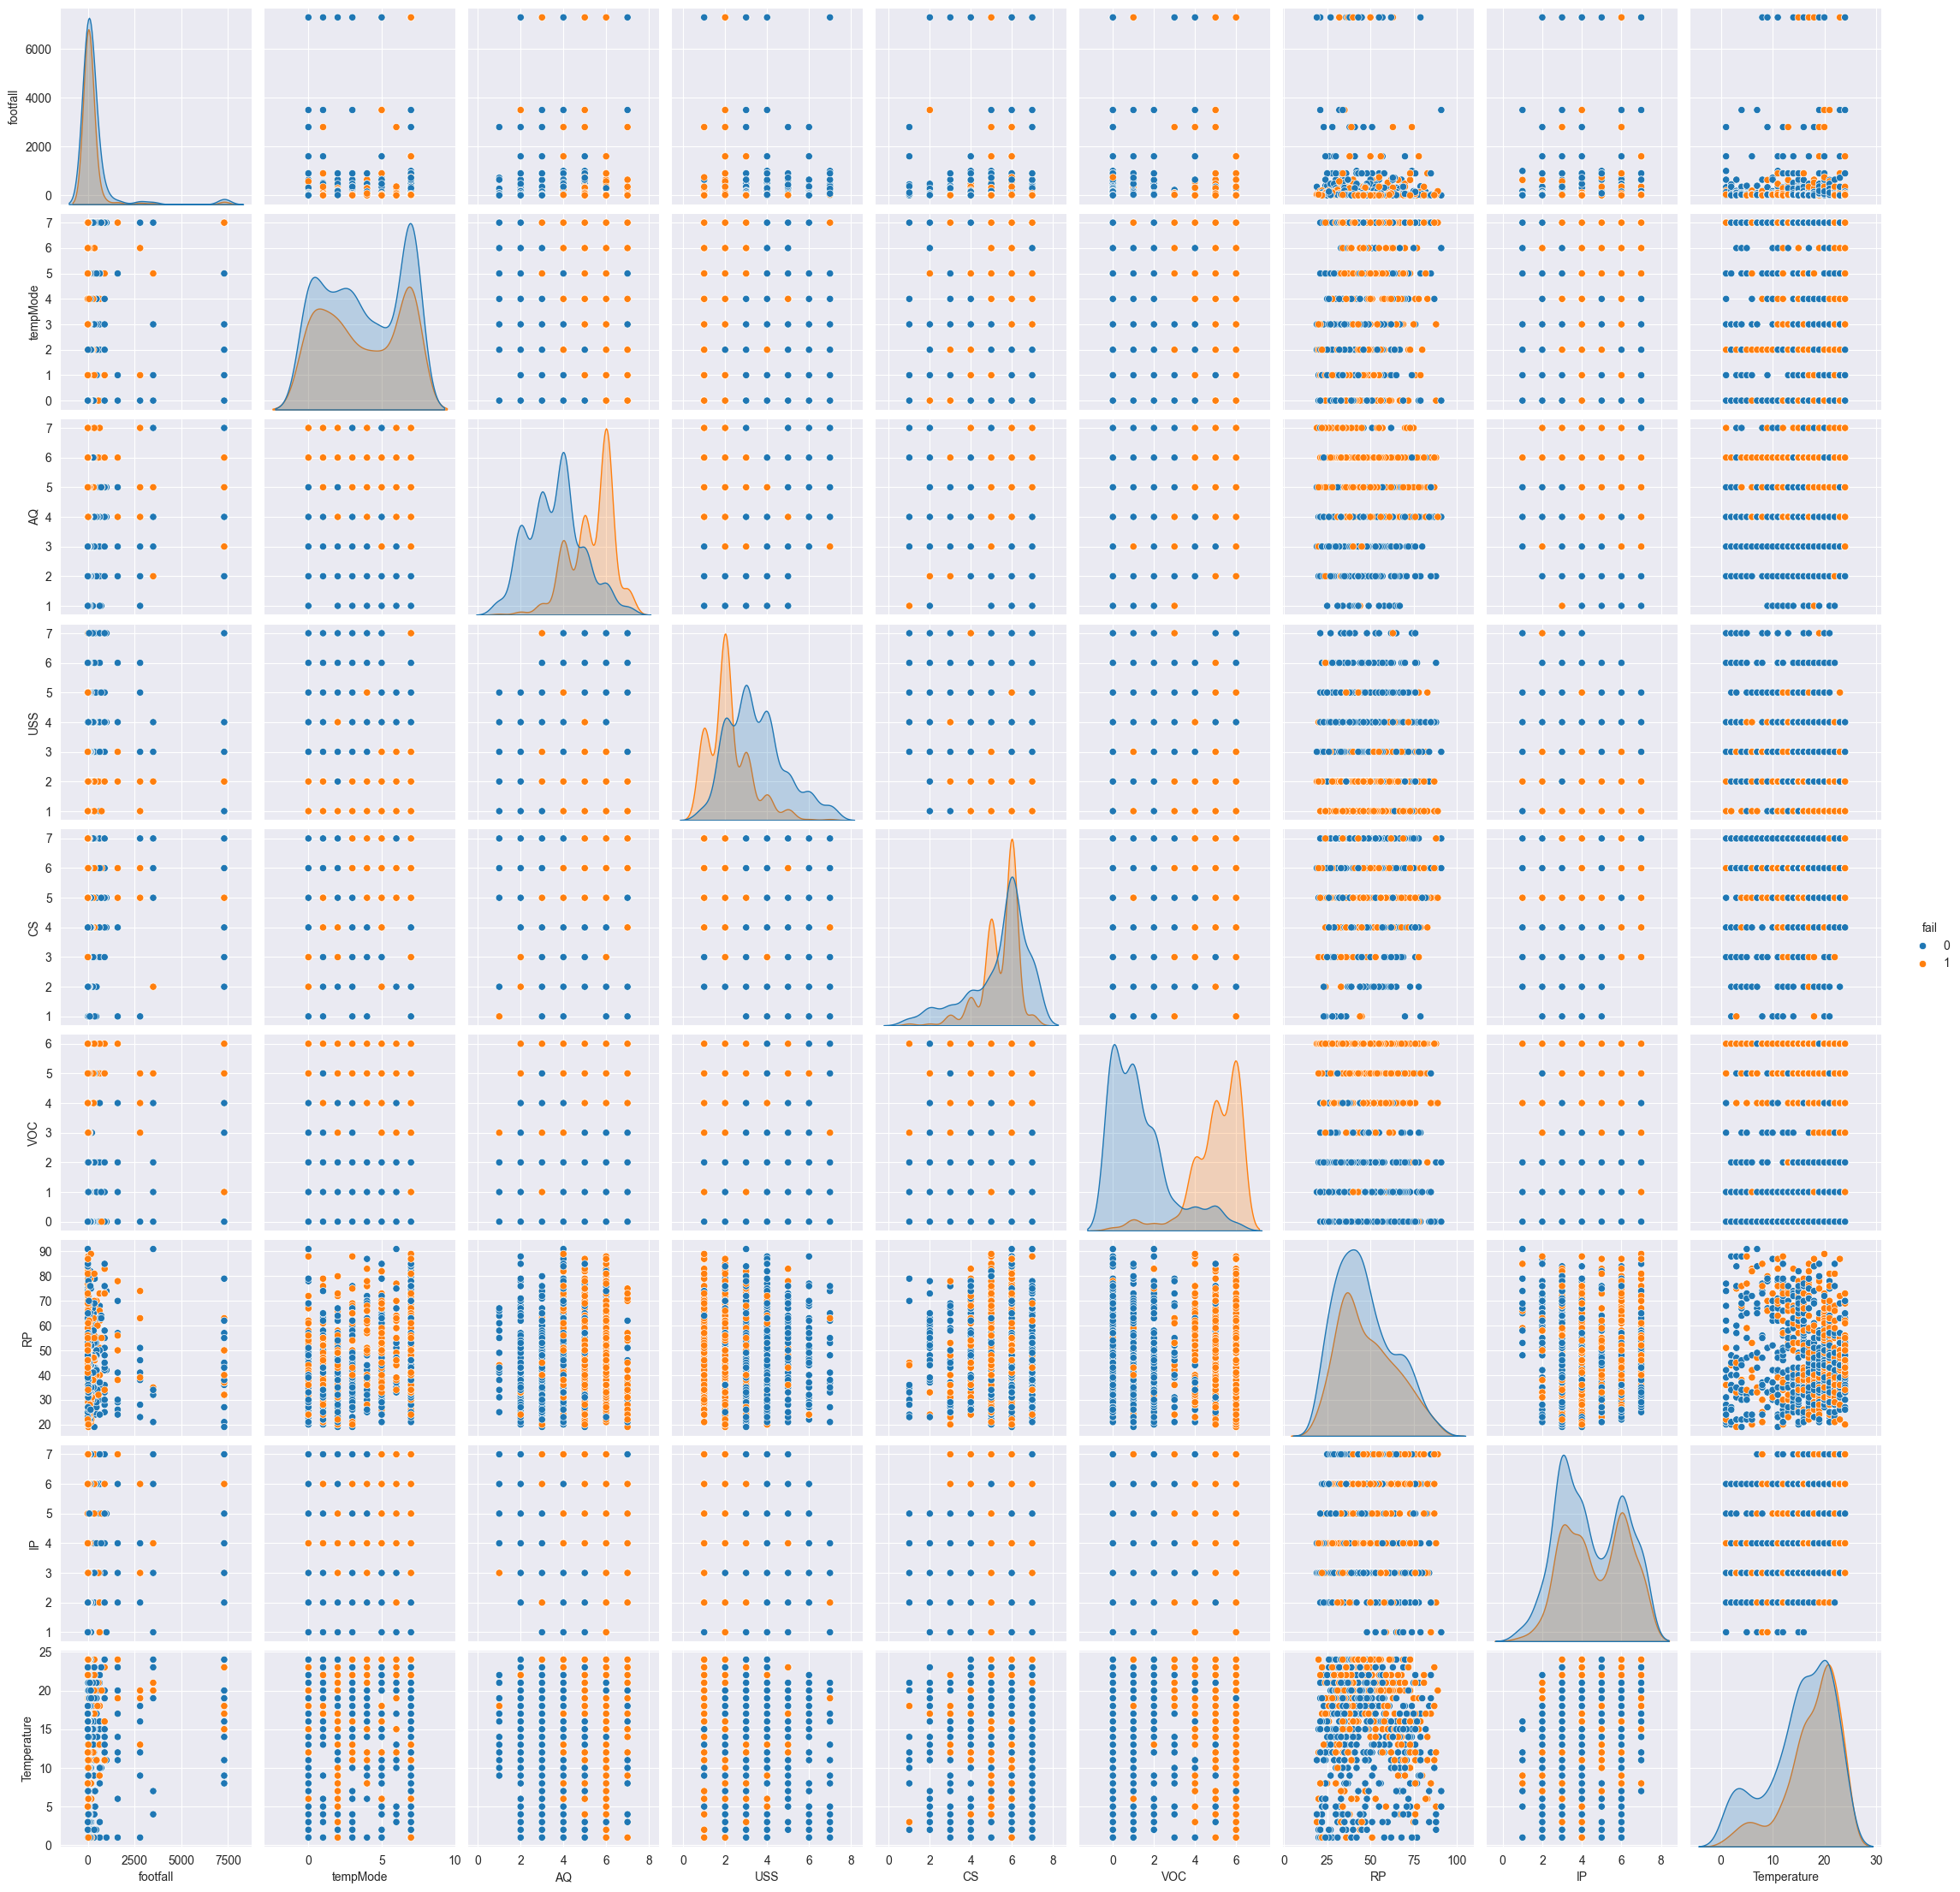

In [19]:
# Pairplot to visualize relationships between features and target
sns.pairplot(data, hue='fail')
plt.show()

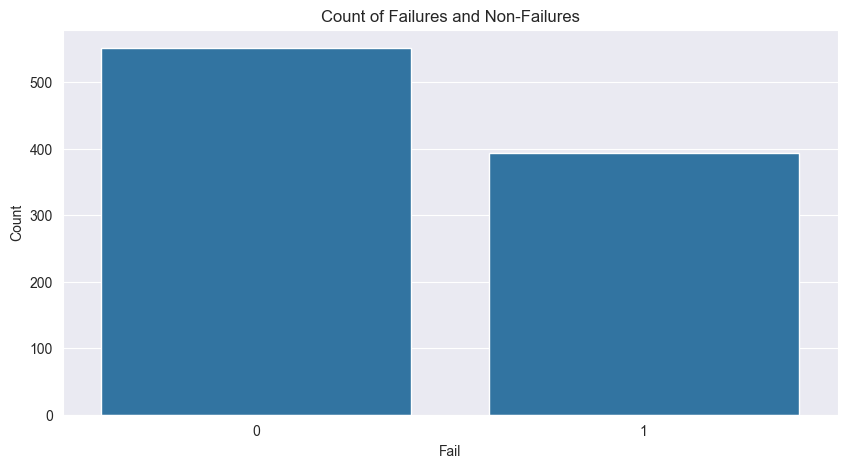

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='fail', data=data)
plt.title('Count of Failures and Non-Failures')
plt.xlabel('Fail')
plt.ylabel('Count')
plt.show()

In [24]:
data.columns

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

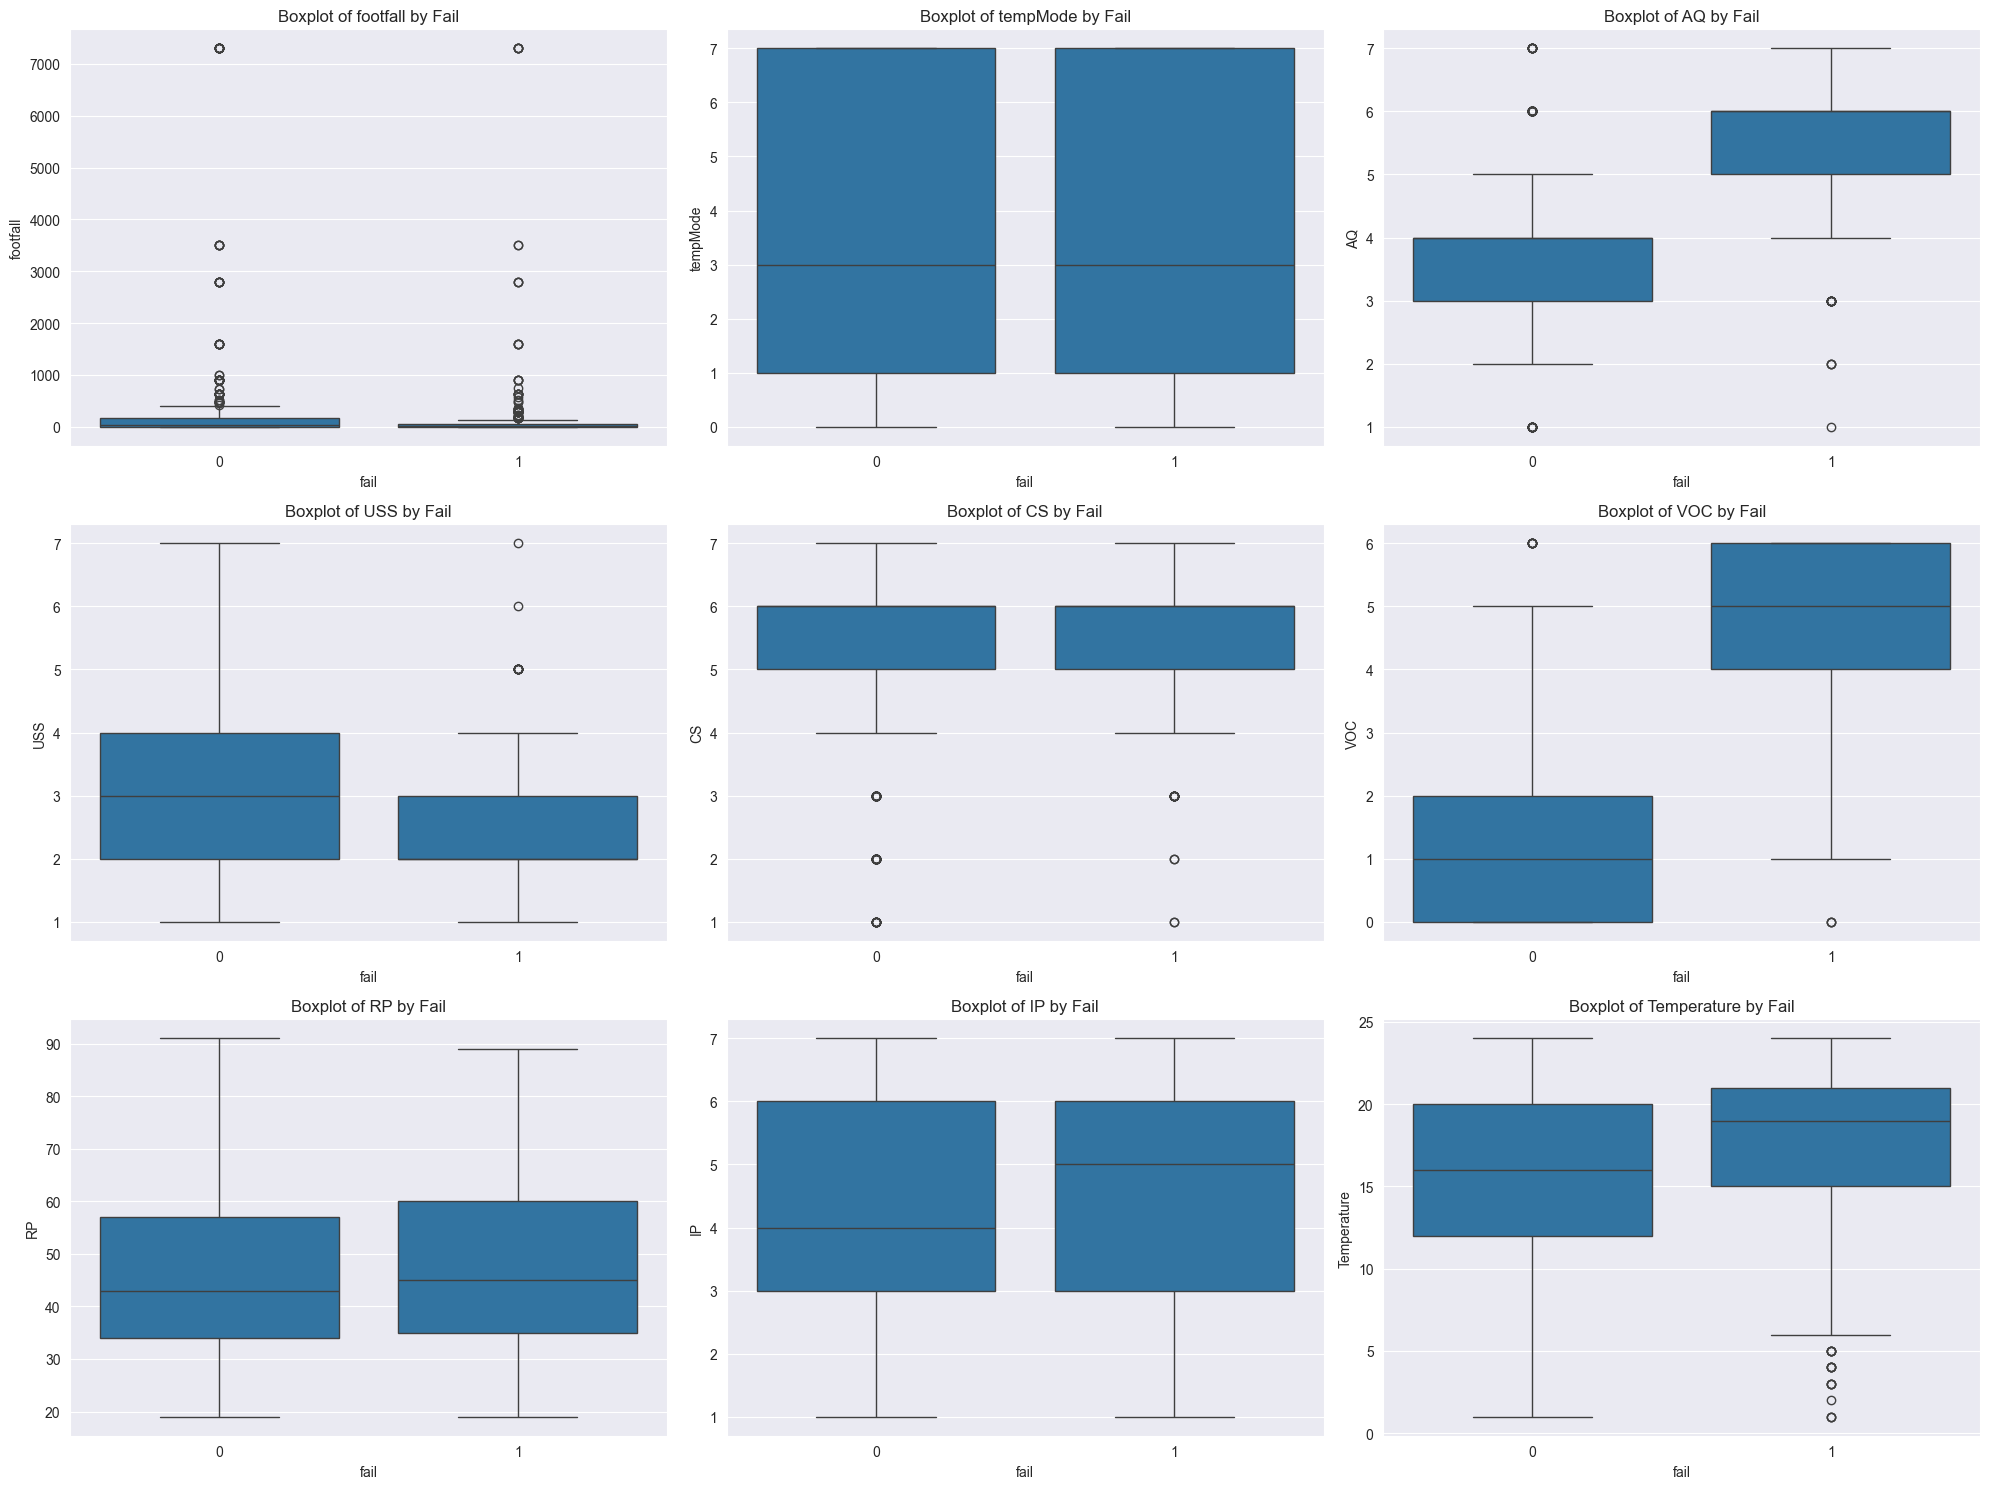

In [26]:
features = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

plt.figure(figsize=(20, 15))
m = 1
for i in features:
    plt.subplot(3, 3, m)
    sns.boxplot(data=data, y=i, x='fail')
    plt.title(f'Boxplot of {i} by Fail')
    m += 1
plt.tight_layout()
plt.show()

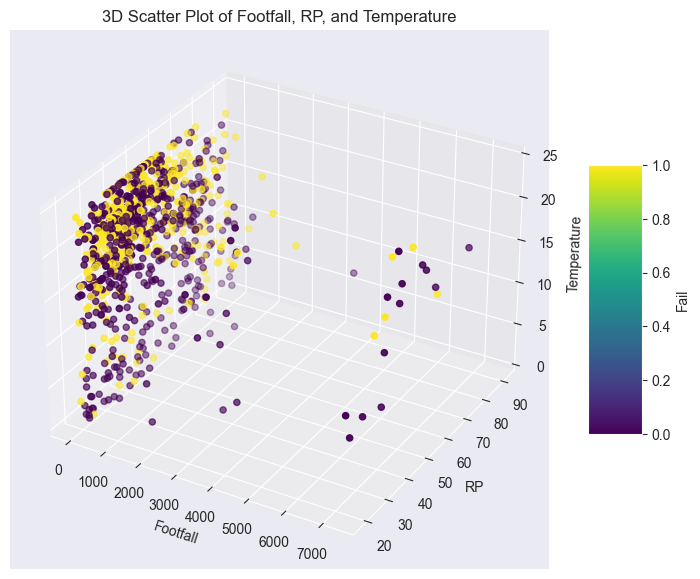

In [28]:
#creating a 3d respresentation using a scatter plot
from mpl_toolkits.mplot3d import Axes3D
x = data['footfall']
y = data['RP']
z = data['Temperature']
c = data['fail']
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=c, cmap='viridis', label=c)
ax.set_xlabel('Footfall')
ax.set_ylabel('RP')
ax.set_zlabel('Temperature')
ax.set_title('3D Scatter Plot of Footfall, RP, and Temperature')
cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Fail')

plt.show()

In [30]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('fail', axis=1))

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

missing_values = data.isnull().sum()

X = data.drop('fail', axis=1)
y = data['fail']

# OneHotEncoding for 'tempMode' if it's categorical
categorical_features = ['tempMode']
ct = ColumnTransformer([("encoder", OneHotEncoder(sparse_output=False), categorical_features)], remainder='passthrough')
X = ct.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.873015873015873
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       102
           1       0.85      0.89      0.87        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



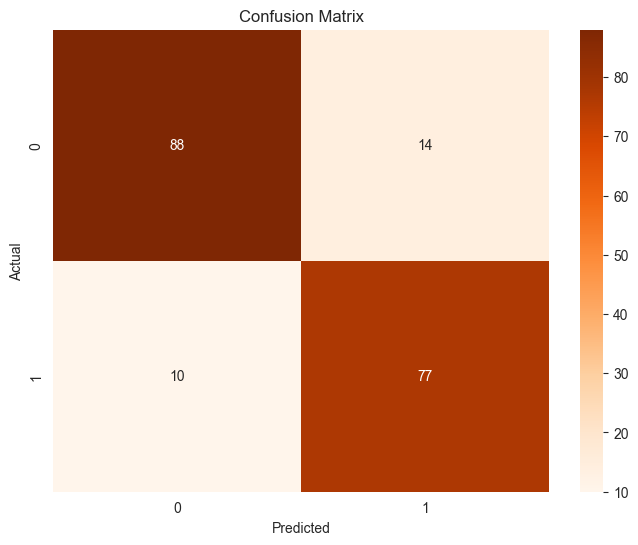

In [48]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
